<a href="https://colab.research.google.com/github/Kamiilykam/pandas-challenge/blob/master/Sci_Re_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre-Processing

In [1]:
#Load Data visuals Pkgs
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:

#Load Pkgs 
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score




In [4]:
df =pd.read_csv('/content/drive/MyDrive/seaturtle.csv')
df.head()

Beach Name Loggerhead nest density classification  muLength  \
0  Tequesta Beaches                                   HIGH       1.4   
1  Tequesta Beaches                                   HIGH       1.4   
2  Tequesta Beaches                                   HIGH       1.4   
3  Tequesta Beaches                                   HIGH       1.4   
4  Tequesta Beaches                                   HIGH       1.4   

   Loggerheadnest  FalseCrawls      NDVI      NDBI     NDESI      NMDI  \
0           13198        20154  0.724852 -0.993130 -0.475040  0.696732   
1           13198        20154  0.611526 -0.993961  0.149446  0.616734   
2           13198        20154  0.548077 -0.993850 -0.109342  0.575013   
3           13198        20154  0.107129 -0.994667  0.209199  0.552848   
4           13198        20154  0.399375 -0.993595  0.021055  0.585838   

       NDWI     SLOPE  ELEVATION  CAT  
0  0.463376  1.914644       10.0    5  
1  0.285822  4.741489       12.0    5  
2  0.167234  1.921275       10.0    5  
3  0.110232  3.330971       10.0    3  
4  0.227506  0.000000       12.0    5

In [5]:
#Check data for null values
df.isnull().sum()

Beach Name                                    0
Loggerhead nest density classification        0
muLength                                      0
Loggerheadnest                                0
FalseCrawls                                   0
NDVI                                      13206
NDBI                                      13206
NDESI                                     13206
NMDI                                      13206
NDWI                                      13206
SLOPE                                     16255
ELEVATION                                 14383
CAT                                           0
dtype: int64

In [6]:
df= df.dropna()
df.isnull().sum()

Beach Name                                0
Loggerhead nest density classification    0
muLength                                  0
Loggerheadnest                            0
FalseCrawls                               0
NDVI                                      0
NDBI                                      0
NDESI                                     0
NMDI                                      0
NDWI                                      0
SLOPE                                     0
ELEVATION                                 0
CAT                                       0
dtype: int64

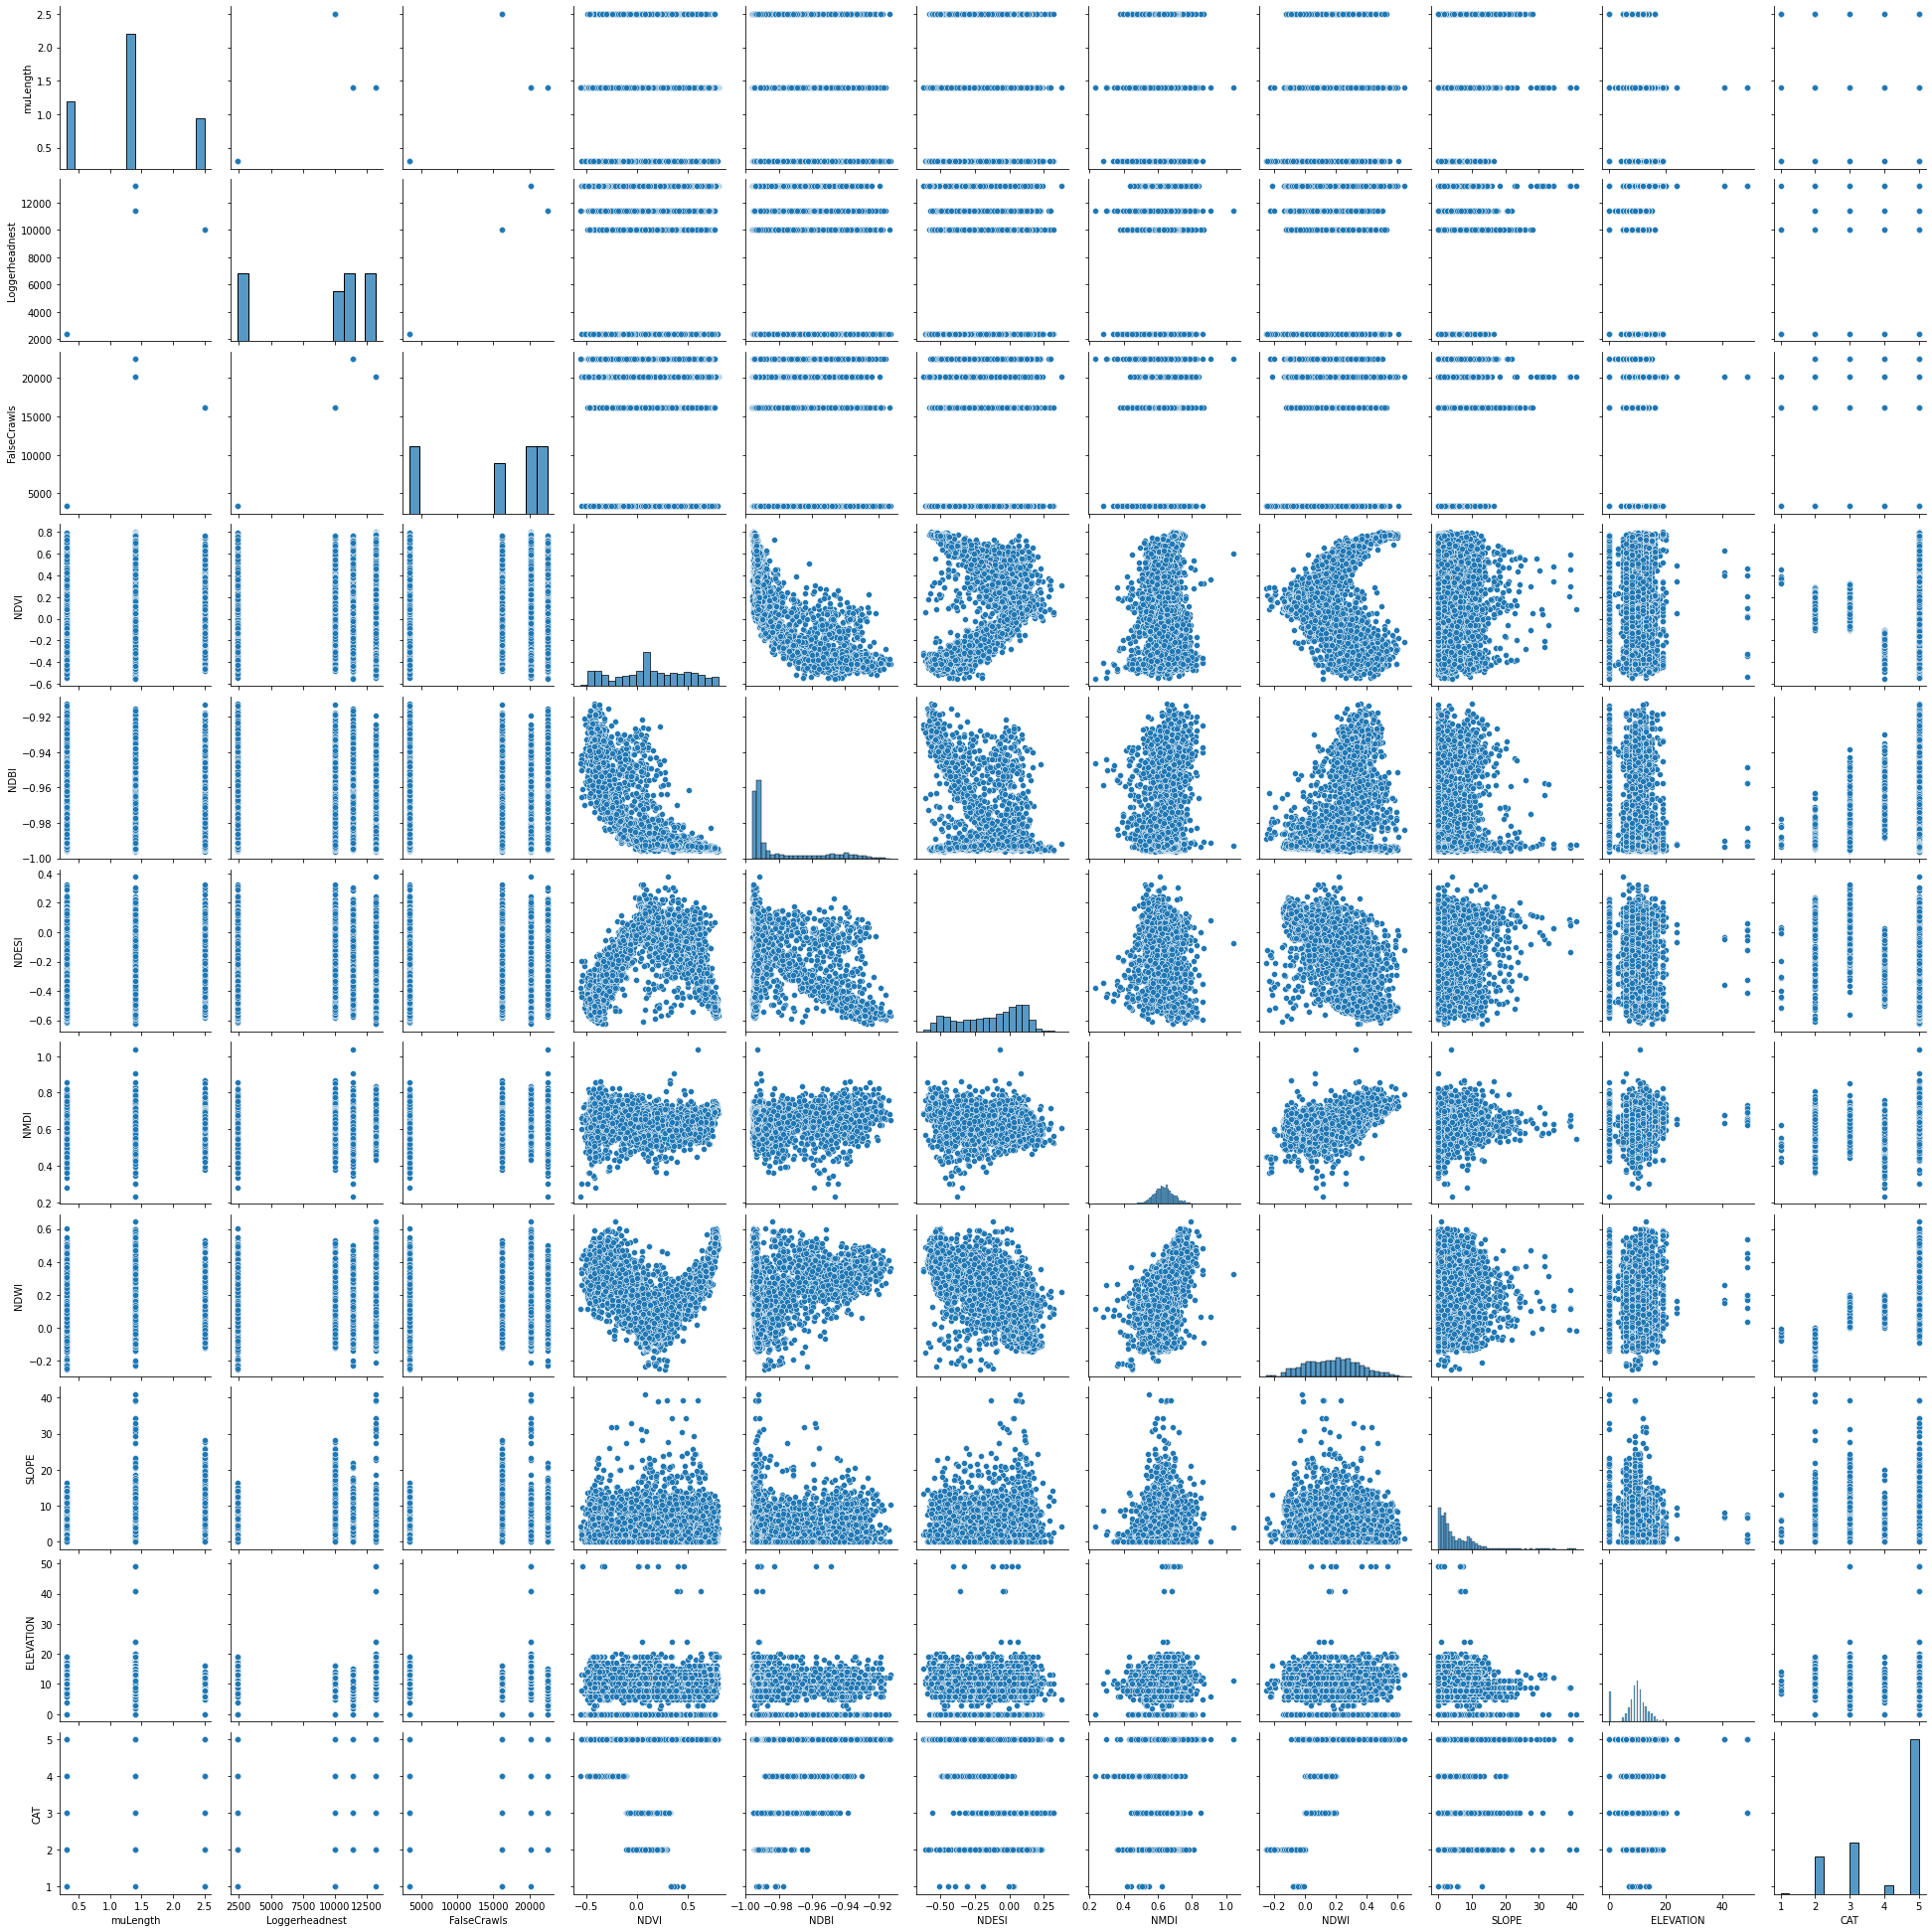

In [7]:
sns.pairplot(df)
plt.show()

In [8]:

x= df[df.columns.drop('CAT')]
y=df[['CAT']]


In [9]:
# handle categorical variable
states=pd.get_dummies(x,drop_first=True)
# dropping extra column
x= x.drop(['Beach Name','Loggerhead nest density classification'],axis=1)
# concatation of independent variables and new cateorical variable.
x=pd.concat([x,states],axis=1)
x

muLength  Loggerheadnest  FalseCrawls      NDVI      NDBI     NDESI  \
0          1.4           13198        20154  0.724852 -0.993130 -0.475040   
1          1.4           13198        20154  0.611526 -0.993961  0.149446   
2          1.4           13198        20154  0.548077 -0.993850 -0.109342   
3          1.4           13198        20154  0.107129 -0.994667  0.209199   
4          1.4           13198        20154  0.399375 -0.993595  0.021055   
...        ...             ...          ...       ...       ...       ...   
3740       2.5           10003        16139  0.764335 -0.994021 -0.506717   
3741       2.5           10003        16139  0.629326 -0.993360 -0.331128   
3742       2.5           10003        16139  0.079747 -0.991002  0.117254   
3743       2.5           10003        16139  0.084388 -0.992213  0.128616   
3744       2.5           10003        16139 -0.242938 -0.971182 -0.291954   

          NMDI      NDWI      SLOPE  ELEVATION  ...      NDVI      NDBI  \
0     0.696732  0.463376   1.914644       10.0  ...  0.724852 -0.993130   
1     0.616734  0.285822   4.741489       12.0  ...  0.611526 -0.993961   
2     0.575013  0.167234   1.921275       10.0  ...  0.548077 -0.993850   
3     0.552848  0.110232   3.330971       10.0  ...  0.107129 -0.994667   
4     0.585838  0.227506   0.000000       12.0  ...  0.399375 -0.993595   
...        ...       ...        ...        ...  ...       ...       ...   
3740  0.695138  0.514970  12.791381        0.0  ...  0.764335 -0.994021   
3741  0.637447  0.247521   0.000000        0.0  ...  0.629326 -0.993360   
3742  0.672979 -0.032539   4.777289        0.0  ...  0.079747 -0.991002   
3743  0.653468 -0.086325  13.170510        0.0  ...  0.084388 -0.992213   
3744  0.636047  0.172739  10.855462       12.0  ... -0.242938 -0.971182   

         NDESI      NMDI      NDWI      SLOPE  ELEVATION  \
0    -0.475040  0.696732  0.463376   1.914644       10.0   
1     0.149446  0.616734  0.285822   4.741489       12.0   
2    -0.109342  0.575013  0.167234   1.921275       10.0   
3     0.209199  0.552848  0.110232   3.330971       10.0   
4     0.021055  0.585838  0.227506   0.000000       12.0   
...        ...       ...       ...        ...        ...   
3740 -0.506717  0.695138  0.514970  12.791381        0.0   
3741 -0.331128  0.637447  0.247521   0.000000        0.0   
3742  0.117254  0.672979 -0.032539   4.777289        0.0   
3743  0.128616  0.653468 -0.086325  13.170510        0.0   
3744 -0.291954  0.636047  0.172739  10.855462       12.0   

      Beach Name_Jupiter Beach (including Carlin)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
3740                                            1   
3741                                            1   
3742                                            1   
3743                                            1   
3744                                            1   

      Beach Name_Jupiter Inlet Colony  Beach Name_Tequesta Beaches  
0                                   0                            1  
1                                   0                            1  
2                                   0                            1  
3                                   0                            1  
4                                   0                            1  
...                               ...                          ...  
3740                                0                            0  
3741                                0                            0  
3742                                0                            0  
3743                                0                            0  
3744                                0                          

In [10]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [11]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (2509, 23)
X_test: (1236, 23)
Y_train: (2509, 1)
Y_test: (1236, 1)


<function matplotlib.pyplot.show(*args, **kw)>

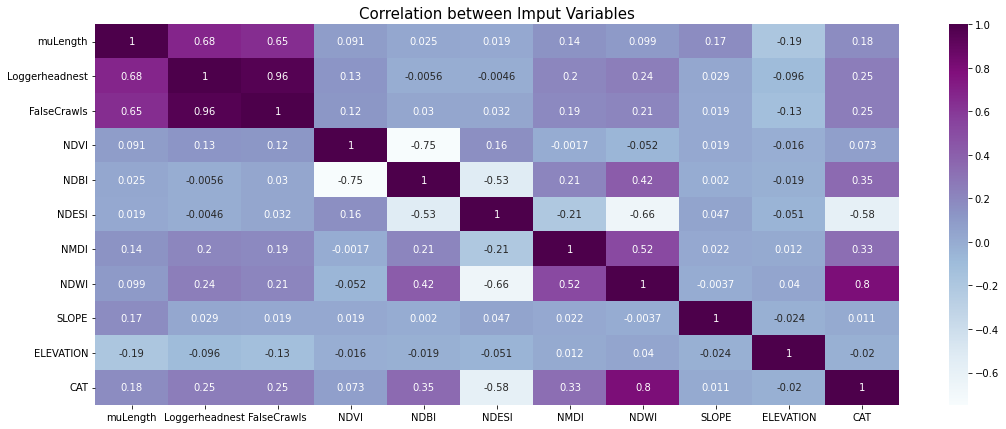

In [12]:
#Bivariate Analysis
plt.figure(figsize = (18,7))
correlation = df.corr()
sns.heatmap(correlation, annot = True, cmap = "BuPu")
plt.title("Correlation between Imput Variables", size = 15)
plt.show

#Multiple Linear Regression

In [13]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train, y_train)

LinearRegression()

In [14]:
y_prediction = LR.predict(x_test)
y_prediction

array([[4.40721637],
       [4.60041454],
       [4.7030086 ],
       ...,
       [3.33900428],
       [4.32541298],
       [5.32141363]])

In [15]:
R2=r2_score(y_test,y_prediction)
print('Accuracy of the model is %.2f'%R2)

Accuracy of the model is 0.71


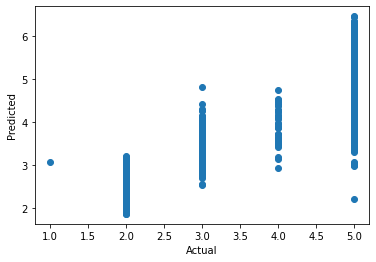

In [16]:
plt.scatter(y_test,y_prediction);
plt.xlabel('Actual');
plt.ylabel('Predicted');

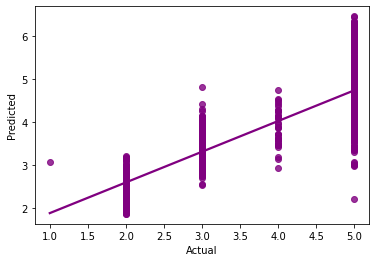

In [17]:
sns.regplot(x=y_test,y=y_prediction, ci= None, color = 'purple');
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [90]:
basel =pd.DataFrame()
basel['actual'] = y_test
basel['predictions'] = y_prediction
basel['difference'] = (basel['actual'])- (basel['predictions'])
basel

actual  predictions  difference
3400       5     4.407216    0.592784
1114       5     4.600415    0.399585
351        5     4.703009    0.296991
2126       3     3.670109   -0.670109
2323       3     3.705489   -0.705489
...      ...          ...         ...
3652       5     5.037124   -0.037124
2009       5     4.834879    0.165121
1457       3     3.339004   -0.339004
3146       5     4.325413    0.674587
994        5     5.321414   -0.321414

[1236 rows x 3 columns]

In [91]:
basel.to_csv('basel.csv')
!cp basel.csv "drive/My Drive/"

In [ ]:
mse = mean_squared_error(y_test, y_prediction)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

MSE: 0.41
RMSE: 0.64


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
mean_absolute_percentage_error(y_test, y_prediction)

0.13878394494308216

# Bayesian Ridge Linear Regression


In [32]:
#Load Data visuals Pkgs
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [34]:

#Load Pkgs 
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [35]:
df =pd.read_csv('/content/drive/MyDrive/seaturtle.csv')
df= df.dropna()

In [36]:

# Importing modules that are required
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge

X= df[df.columns.drop('CAT')]
y=df[['CAT']]

# handle categorical variable
states=pd.get_dummies(X,drop_first=True)
# dropping extra column
X= X.drop(['Beach Name','Loggerhead nest density classification'],axis=1)
# concatation of independent variables and new cateorical variable.
X=pd.concat([X,states],axis=1)


   
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
   
# Creating and training model
model = BayesianRidge()
model.fit(X_train, y_train)
   
# Model making a prediction on test data
prediction = model.predict(X_test)
   
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y_test, prediction)}")

r2 Score Of Test Set : 0.7065316321442205


In [37]:
mse = mean_squared_error(y_test, prediction)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

MSE: 0.41
RMSE: 0.64


In [87]:
baseb =pd.DataFrame()
baseb['actual'] = y_test
baseb['predictions'] = prediction
baseb['difference'] = (baseb['actual'])- (baseb['predictions'])
baseb

actual  predictions  difference
3400       5     4.404916    0.595084
1114       5     4.613822    0.386178
351        5     4.687631    0.312369
2126       3     3.699041   -0.699041
2323       3     3.696589   -0.696589
...      ...          ...         ...
3652       5     5.058126   -0.058126
2009       5     4.831460    0.168540
1457       3     3.340253   -0.340253
3146       5     4.321341    0.678659
994        5     5.308383   -0.308383

[1236 rows x 3 columns]

In [89]:
baseb.to_csv('baseb.csv')
!cp baseb.csv "drive/My Drive/"

# Light Gradient Boosting Machine Regression

In [39]:
import lightgbm as lgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pandas import DataFrame
import matplotlib.pyplot as plt

In [40]:
#Load Data visuals Pkgs
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [42]:

#Load Pkgs 
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score




In [43]:
df =pd.read_csv('/content/drive/MyDrive/seaturtle.csv')
df= df.dropna()

In [44]:

X= df[df.columns.drop('CAT')]
y=df[['CAT']]

# handle categorical variable
states=pd.get_dummies(X,drop_first=True)
# dropping extra column
X= X.drop(['Beach Name','Loggerhead nest density classification'],axis=1)
# concatation of independent variables and new cateorical variable.
X=pd.concat([X,states],axis=1)

   
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)



In [45]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [46]:

# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

In [47]:
# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

[1]	valid_0's l1: 0.984376	valid_0's l2: 1.13377
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's l1: 0.887368	valid_0's l2: 0.921993
[3]	valid_0's l1: 0.800076	valid_0's l2: 0.750623
[4]	valid_0's l1: 0.721513	valid_0's l2: 0.612043
[5]	valid_0's l1: 0.650782	valid_0's l2: 0.499807
[6]	valid_0's l1: 0.587136	valid_0's l2: 0.409112
[7]	valid_0's l1: 0.529796	valid_0's l2: 0.335632
[8]	valid_0's l1: 0.478235	valid_0's l2: 0.276341
[9]	valid_0's l1: 0.431816	valid_0's l2: 0.22837
[10]	valid_0's l1: 0.390224	valid_0's l2: 0.189457
[11]	valid_0's l1: 0.35264	valid_0's l2: 0.158085
[12]	valid_0's l1: 0.318982	valid_0's l2: 0.132659
[13]	valid_0's l1: 0.288551	valid_0's l2: 0.112173
[14]	valid_0's l1: 0.261249	valid_0's l2: 0.0954559
[15]	valid_0's l1: 0.236566	valid_0's l2: 0.0820729
[16]	valid_0's l1: 0.214611	valid_0's l2: 0.0710431
[17]	valid_0's l1: 0.194558	valid_0's l2: 0.0622579
[18]	valid_0's l1: 0.176177	valid_0's l2: 0.0545985
[19]	valid_0's l1: 0.159897

In [54]:
# prediction
y_pred1 = model.predict(X_test)

# accuracy check
mse = mean_squared_error(y_test, y_pred1)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 
 

   

MSE: 0.02
RMSE: 0.15


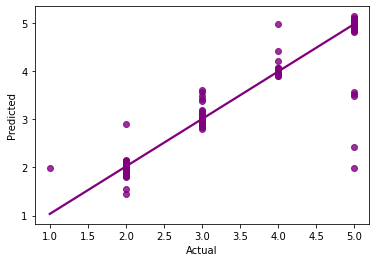

In [55]:
# visualizing in a plot
sns.regplot(x=y_test,y=y_pred1, ci= None, color = 'purple');
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()  
 

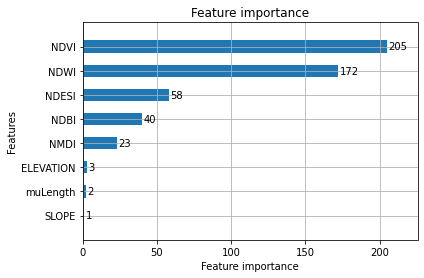

In [56]:
# plotting feature importance
lgb.plot_importance(model, height=.5)

In [57]:
R2=r2_score(y_test,y_pred1)
print('Accuracy of the model is %.2f'%R2)

Accuracy of the model is 0.98


In [58]:
mse = mean_squared_error(y_test, y_pred1)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

MSE: 0.02
RMSE: 0.15


In [61]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [62]:
mean_absolute_percentage_error(y_test, y_pred1)

0.008908486779163874

In [63]:
rms = sqrt(mean_squared_error(y_test, y_pred1))
print("RMSE: %.2f" % rms)

RMSE: 0.15


In [84]:
baselgb =pd.DataFrame()
baselgb['actual'] = y_test
baselgb['predictions'] = y_pred1
baselgb['difference'] = (baselgb['actual'])- (baselgb['predictions'])
baselgb

actual  predictions  difference
3400       5     4.995461    0.004539
1114       5     5.005434   -0.005434
351        5     4.996145    0.003855
2126       3     3.011319   -0.011319
2323       3     3.100323   -0.100323
...      ...          ...         ...
3652       5     4.996352    0.003648
2009       5     4.996596    0.003404
1457       3     3.007850   -0.007850
3146       5     4.993905    0.006095
994        5     4.996596    0.003404

[1236 rows x 3 columns]

In [86]:
baselgb.to_csv('baselgb.csv')
!cp baselgb.csv "drive/My Drive/"

# Elastic Net Regression

In [65]:
from numpy import mean
from numpy import arange
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [66]:
df =pd.read_csv('/content/drive/MyDrive/seaturtle.csv')
df= df.dropna()

In [67]:

X= df[df.columns.drop('CAT')]
y=df[['CAT']]


# handle categorical variable
states=pd.get_dummies(X,drop_first=True)
# dropping extra column
X= X.drop(['Beach Name','Loggerhead nest density classification'],axis=1)
# concatation of independent variables and new cateorical variable.
X=pd.concat([X,states],axis=1)

   
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)



In [68]:
ela_train = lgb.Dataset(X_train, y_train)
ela_eval = lgb.Dataset(X_test, y_test, reference=ela_train)

In [69]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [70]:

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [71]:
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 1.038 (0.025)


In [72]:
model.fit(X, y)

ElasticNet()

In [73]:
y_pred2 = model.predict(X_test)

In [75]:
mse = mean_squared_error(y_test, y_pred2)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

MSE: 1.30
RMSE: 1.14


In [76]:
mean_absolute_percentage_error(y_test, y_pred2)

0.3206220500968941

In [79]:
R2=r2_score(y_test,y_pred2)*10
print('Accuracy of the model is %.2f'%R2)

Accuracy of the model is 0.67


In [ ]:
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.508
Config: {'alpha': 1e-05, 'l1_ratio': 0.0}


In [ ]:
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.508
Config: {'alpha': 1e-05, 'l1_ratio': 0.0}


In [80]:
base =pd.DataFrame()
base['actual'] = y_test
base['predictions'] = y_pred2
base['difference'] = (base['actual'])- (base['predictions'])
base

actual  predictions  difference
3400       5     4.144585    0.855415
1114       5     3.611853    1.388147
351        5     4.341352    0.658648
2126       3     4.322079   -1.322079
2323       3     4.322079   -1.322079
...      ...          ...         ...
3652       5     4.144585    0.855415
2009       5     4.322079    0.677921
1457       3     3.611853   -0.611853
3146       5     4.144585    0.855415
994        5     4.341352    0.658648

[1236 rows x 3 columns]

In [83]:
base.to_csv('base.csv')
!cp base.csv "drive/My Drive/"